# [453-visualization](https://github.com/jeffc1020/453-visualization)

by Jeff Cutcher, John Knecht, and Tanner Michael

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("US_Accidents_Dec21_updated.csv")

## Part 1: Data Cleaning

1: Check how many values are missing from each column

In [3]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

2: Drop unnecessary columns

In [4]:
df = df.drop(columns=['Number', 'Sunrise_Sunset', 'Nautical_Twilight', 'Astronomical_Twilight', 'Street', 
                      'Zipcode', 'Timezone', 'ID', 'End_Lat', 'End_Lng', 'Country', 'Airport_Code', 
                      'Weather_Timestamp', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Direction', 
                      'Wind_Speed(mph)'])

In [5]:
pd.set_option('display.max_columns', None)
df.head(1000)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Side,City,County,State,Temperature(F),Visibility(mi),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Civil_Twilight
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,R,Dublin,Franklin,OH,42.1,10.0,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
1,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,0.747,At OH-4/OH-235/Exit 41 - Accident.,R,Dayton,Montgomery,OH,36.9,10.0,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,0.055,At I-71/US-50/Exit 1 - Accident.,R,Cincinnati,Hamilton,OH,36.0,10.0,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night
3,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,0.123,At Dart Ave/Exit 21 - Accident.,R,Akron,Summit,OH,39.0,10.0,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
4,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,At Mitchell Ave/Exit 6 - Accident.,R,Cincinnati,Hamilton,OH,37.0,10.0,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,2016-03-23 05:55:55,2016-03-23 11:55:55,37.425920,-122.098790,0.405,At San Antonio Rd/Exit 400B/Exit 400C - Accide...,R,Palo Alto,Santa Clara,CA,48.2,30.0,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
996,2,2016-03-23 06:39:54,2016-03-23 12:39:54,37.757450,-122.211310,0.556,At 66th Ave - Accident. Center lane blocked.,R,Oakland,Alameda,CA,46.9,10.0,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
997,2,2016-03-23 06:45:09,2016-03-23 12:45:09,37.316480,-121.967460,0.595,At Saratoga Ave - Accident. Left lane blocked.,R,San Jose,Santa Clara,CA,46.0,10.0,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Day
998,2,2016-03-23 06:56:44,2016-03-23 12:56:44,37.444150,-122.268800,0.521,At Farm Hill Blvd - Accident. Left lane blocked.,R,Redwood City,San Mateo,CA,48.2,10.0,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day


Looks like the reason precipitation is missing in some rows is because there was no accumulated precipitation 
during the time of the accident.

In [6]:
precip_missing = df[df['Precipitation(in)'].isnull()]
precip_missing['Weather_Condition'].value_counts()

Clear                 172786
Overcast               72357
Mostly Cloudy          72029
Partly Cloudy          51271
Fair                   45103
                       ...  
Small Hail                 1
Wintry Mix / Windy         1
Snow / Windy               1
Heavy Ice Pellets          1
Light Haze                 1
Name: Weather_Condition, Length: 80, dtype: int64

3: Fill in null values for precipitation, visibility, temperature, and weather condition columns

In [7]:
# replace the null values in the precipitation column with 0
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(0)

# replace null values in visibility with 10 mi
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(10)

# fill temperature with the average of the temperature column
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].mean())

# Fill weather condition with mode of weather condition
weather_mode = df['Weather_Condition'].mode()
df['Weather_Condition'] = df['Weather_Condition'].fillna('Fair')

In [8]:
df = df.dropna()
df.isnull().sum()

Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Description          0
Side                 0
City                 0
County               0
State                0
Temperature(F)       0
Visibility(mi)       0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Civil_Twilight       0
dtype: int64

As you can see, there are no more missing values!

There are over 100 types of weather conditions, some of which are synonymous.

In [9]:
# There are over 100 types of weather conditions. We only want the most common. 

condition_value_counts = df['Weather_Condition'].value_counts()
condition_value_counts


Fair                        1176106
Mostly Cloudy                363759
Cloudy                       348399
Partly Cloudy                249775
Clear                        173817
                             ...   
Sleet / Windy                     1
Mist / Windy                      1
Blowing Sand                      1
Heavy Freezing Rain               1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 127, dtype: int64

4: Drop all rows with weather conditions that have under 600 occurrences

In [10]:
# Drop all rows with weather conditions under 600 occurrences
condition_value_counts = condition_value_counts[condition_value_counts > 600]
df = df[df['Weather_Condition'].isin(condition_value_counts.index)]

Some of the weather conditions mean the same thing ("Rain Shower" and "Rain Showers", for example.)

5: Map each remaining weather condition to a more general one. We should only end up with a total of 11 different conditions.

In [11]:
# Fair <- Clear, Fair / Windy, N/A Precipitation
# Cloudy <- Overcast, Cloudy / Windy, Mostly Cloudy, Mostly Cloudy / Windy
# Partly Cloudy <- Scattered Clouds, Partly Cloudy / Windy
# Rain <- Heavy Rain, Rain / Windy, Heavy Rain / Windy
# Light Rain <- Mist, Light Drizzle, Light Rain / Windy, Drizzle, Showers in the Vicinity
# Snow <- Heavy Snow
# Light Snow <- Light Snow / Windy
# Wintry Mix <- Light Freezing Rain
# Thunderstorm <- T-Storm, Heavy T-Storm
# Light Thunderstorm <- Thunder in the Vicinity, Thunder, Light Rain with Thunder, Light Thunderstorms and Rain
# Fog <- Haze, Patches of Fog, Shallow Fog, Haze / Windy, Fog / Windy
# Smoke

weather_lookup = {
    'Fair': 'Fair',
    'Clear': 'Fair',
    'Fair / Windy': 'Fair',
    'N/A Precipitation': 'Fair',
    'Cloudy': 'Cloudy',
    'Overcast': 'Cloudy',
    'Cloudy / Windy': 'Cloudy',
    'Mostly Cloudy': 'Cloudy',
    'Mostly Cloudy / Windy': 'Cloudy',
    'Partly Cloudy': 'Fair',
    'Scattered Clouds': 'Fair',
    'Partly Cloudy / Windy': 'Fair',
    'Rain': 'Rain',
    'Heavy Rain': 'Rain',
    'Rain / Windy': 'Rain',
    'Heavy Rain / Windy': 'Rain',
    'Light Rain': 'Light Rain',
    'Mist': 'Light Rain',
    'Light Drizzle': 'Light Rain',
    'Light Rain / Windy': 'Light Rain',
    'Drizzle': 'Light Rain',
    'Showers in the Vicinity': 'Light Rain',
    'Snow': 'Snow',
    'Heavy Snow': 'Snow',
    'Light Snow': 'Light Snow',
    'Light Snow / Windy': 'Light Snow',
    'Wintry Mix': 'Wintry Mix',
    'Light Freezing Rain': 'Wintry Mix',
    'Thunderstorm': 'Thunderstorm',
    'T-Storm': 'Thunderstorm',
    'Heavy T-Storm': 'Thunderstorm',
    'Light Thunderstorm': 'Light Thunderstorm',
    'Thunder in the Vicinity': 'Light Thunderstorm',
    'Thunder': 'Light Thunderstorm',
    'Light Rain with Thunder': 'Light Thunderstorm',
    'Light Thunderstorms and Rain': 'Light Thunderstorm',
    'Fog': 'Fog',
    'Haze': 'Fog',
    'Patches of Fog': 'Fog',
    'Shallow Fog': 'Fog',
    'Haze / Windy': 'Fog',
    'Fog / Windy': 'Fog',
    'Smoke': 'Smoke'
}

df['Weather_Condition'] = df.Weather_Condition.map(weather_lookup)
df['Weather_Condition'].value_counts()

Fair                  1664919
Cloudy                 810151
Light Rain             142137
Fog                     79524
Light Snow              45805
Rain                    44665
Light Thunderstorm      19312
Thunderstorm            11127
Smoke                    7191
Snow                     6724
Wintry Mix               4738
Name: Weather_Condition, dtype: int64

6: Convert the date/time strings to dateTime objects so we cann extract data such as hour, month, day of week, etc.

In [12]:
df = df.astype({'Start_Time':'datetime64[ns]', 'End_Time':'datetime64[ns]'})

7: Convert distance from strings to floats

8: Remove distance outliers (any values above the 98th quantile)

9: Remove temperature outliers (any values above the 99th quantile and below the 1st quantile)

In [13]:
# Convert distance from strings to floats
df['Distance(mi)'] = df['Distance(mi)'].astype(float)

# Removing distance outliers
upper_limit = df['Distance(mi)'].quantile(.98)
df = df[(df['Distance(mi)'] < upper_limit)]

# Removing temperature outliers
upper_limit = df['Temperature(F)'].quantile(.99)
lower_limit = df['Temperature(F)'].quantile(.01)
df = df[(df['Temperature(F)'] < upper_limit) & (df['Temperature(F)'] > lower_limit)]

10: Load in state population data in preparation for making the first graph

In [14]:
# Load in state populations to make first graph
populations = pd.read_csv('State Populations.csv')
populations
# This data has 51 states, including DC, while the car accidents dataset leaves out Hawaii and Alaska.
# Furthermore, we should probably convert the state name abbreviations in the big dataset to their actual names to match it up with this dataset.

,State,2018 Population
0,California,39776830
1,Texas,28704330
2,Florida,21312211
3,New York,19862512
4,Pennsylvania,12823989
5,Illinois,12768320
6,Ohio,11694664
7,Georgia,10545138
8,North Carolina,10390149
9,Michigan,9991177


11: Map each state abbreviation in the accident dataframe to the state name in order to match it up with the state population data

In [15]:
state_lookup = {
    'CA':'California',
    'FL':'Florida',
    'TX':'Texas',
    'OR':'Oregon',
    'NY':'New York',
    'VA':'Virginia',
    'PA':'Pennsylvania',
    'MN':'Minnesota',
    'NC':'North Carolina',
    'SC':'South Carolina',
    'AZ':'Arizona',
    'MD':'Maryland',
    'TN':'Tennessee',
    'NJ':'New Jersey',
    'IL':'Illinois',
    'LA':'Louisiana',
    'UT':'Utah',
    'MI':'Michigan',
    'GA':'Georgia',
    'WA':'Washington',
    'CT':'Connecticut',
    'MO':'Missouri',
    'CO':'Colorado',
    'OH':'Ohio',
    'IN':'Indiana',
    'AL':'Alabama',
    'MT':'Montana',
    'AR':'Arkansas',
    'IA':'Iowa',
    'DC':'District of Columbia',
    'OK':'Oklahoma',
    'ID':'Idaho',
    'WI':'Wisconsin',
    'KS':'Kansas',
    'WV':'West Virginia',
    'KY':'Kentucky',
    'MA':'Massachusetts',
    'NV':'Nevada',
    'MS':'Mississippi',
    'DE':'Delaware',
    'RI':'Rhode Island',
    'NH':'New Hampshire',
    'NE':'Nebraska',
    'NM':'New Mexico',
    'ME':'Maine',
    'ND':'North Dakota',
    'WY':'Wyoming',
    'VT':'Vermont',
    'SD':'South Dakota'
}

df['State_Name'] = df.State.map(state_lookup)

In [16]:
accidents_per_state = df['State_Name'].value_counts().to_frame()
accidents_per_state = accidents_per_state.sort_index()
populations = populations.set_index('State')
populations = populations.sort_index()

12: Calculate the accidents per capita

In [17]:
populations.drop(['Alaska', 'Hawaii'])
accidents_per_capita = accidents_per_state.merge(populations, left_on=accidents_per_state.index, right_on='State')
accidents_per_capita = accidents_per_capita.rename(columns={'State_Name': 'Accidents'})
accidents_per_capita['Accidents Per Capita'] = accidents_per_capita['Accidents'] / accidents_per_capita['2018 Population']
accidents_per_capita = accidents_per_capita.sort_values(by='Accidents Per Capita', ascending=False)

12: Scale accidents per capita from 0 to 1

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(accidents_per_capita['Accidents Per Capita'].values.reshape(-1,1))
accidents_per_capita['Per Capita Scaled'] = scaler.transform(accidents_per_capita['Accidents Per Capita'].values.reshape(-1,1))
accidents_per_capita

,State,Accidents,2018 Population,Accidents Per Capita,Per Capita Scaled
35,Oregon,120755,4199563,0.028754,1.000000
3,California,771706,39776830,0.019401,0.672679
8,Florida,392762,21312211,0.018429,0.638667
38,South Carolina,87303,5088916,0.017156,0.594102
42,Utah,46966,3159345,0.014866,0.513971
21,Minnesota,78929,5628162,0.014024,0.484512
44,Virginia,109590,8525660,0.012854,0.443574
7,District of Columbia,9027,703608,0.012830,0.442715
24,Montana,12551,1062330,0.011815,0.407195
18,Maryland,63671,6079602,0.010473,0.360242


## Part 2: Graphing

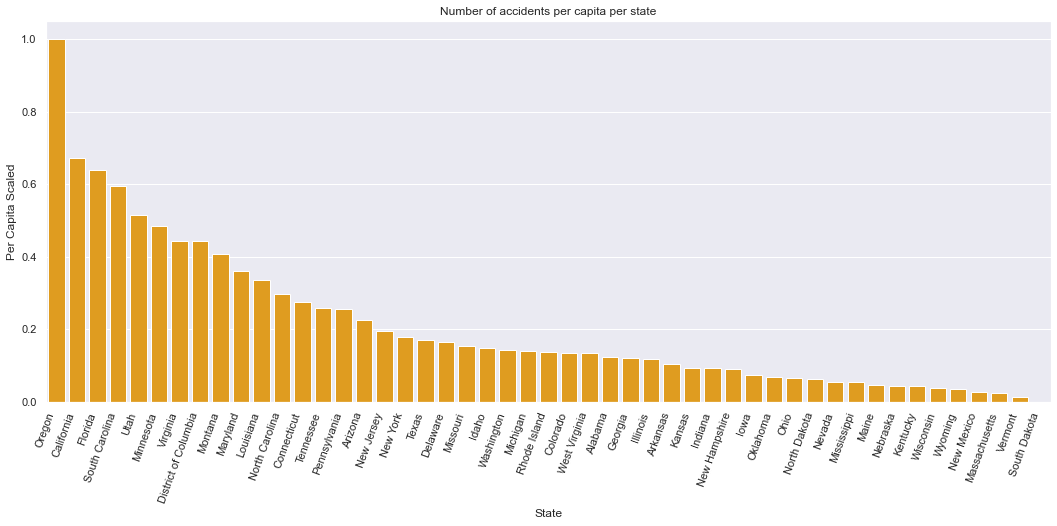

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.figure(figsize=(18,7))
ax = plt.axes()
sns.barplot(x="State", y='Per Capita Scaled', data=accidents_per_capita, color='orange', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha='right')
plt.title('Number of accidents per capita per state')
plt.show()

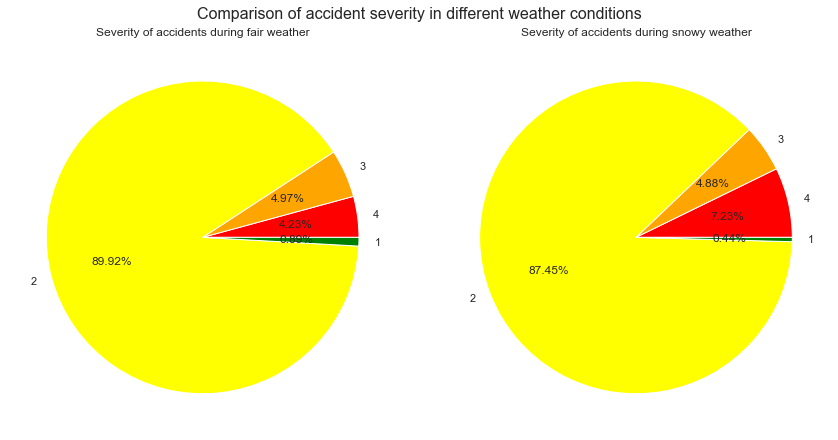

In [20]:
severity_counts_fair = df[df['Weather_Condition'] == 'Fair'].groupby(['Severity']).size().sort_index(ascending=False)
severity_counts_snow = df[df['Weather_Condition'] == 'Snow'].groupby(['Severity']).size().sort_index(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, sharey=True, figsize=(12,6))
ax1.pie(severity_counts_fair, labels=severity_counts_fair.index, colors=['red', 'orange', 'yellow', 'green'], autopct='%.2f%%')
ax1.set_title('Severity of accidents during fair weather')

ax2.pie(severity_counts_snow, labels=severity_counts_snow.index, colors=['red', 'orange', 'yellow', 'green'], autopct='%.2f%%')
ax2.set_title('Severity of accidents during snowy weather')

fig.suptitle('Comparison of accident severity in different weather conditions', fontsize=16)

plt.show()

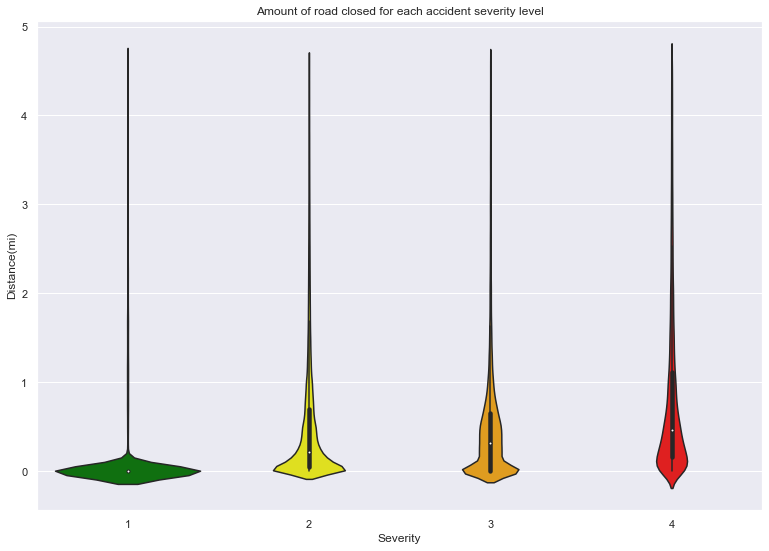

In [21]:
plt.figure(figsize=(13,9))
sns.violinplot(x='Severity', y='Distance(mi)', data=df, palette=['green', 'yellow', 'orange', 'red'])
plt.title('Amount of road closed for each accident severity level')
plt.show()

In [125]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,9))
severity_cmap = ListedColormap(['green', 'gold', 'orange', 'red'])
#plt.scatter(x='Start_Lng', y='Start_Lat', data=df, s=0.03, c='Severity', cmap=severity_cmap)
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, s=2, alpha=0.7, hue='Severity', palette=severity_cmap)
plt.title('Map of accidents for the Continental US')
plt.show()

You can see that some states have more data or report accidents differently, making the "Accidents per capita" graph misleading.

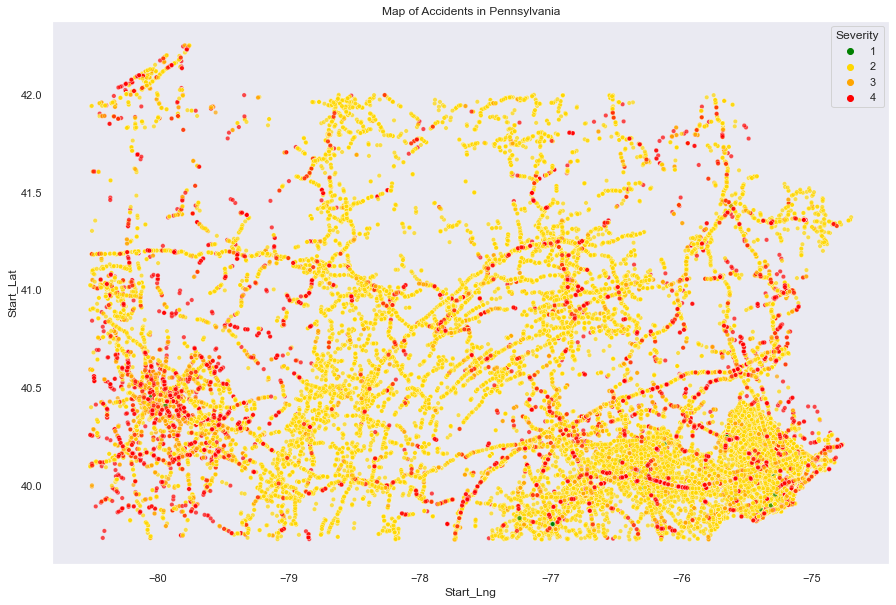

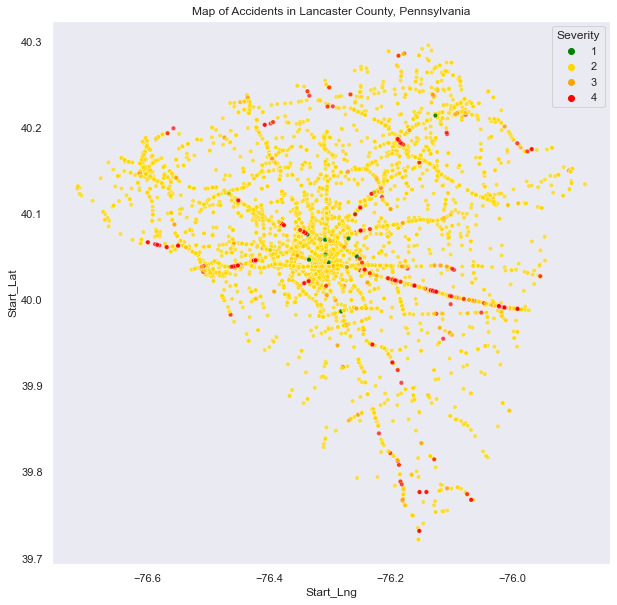

In [ ]:
pennsylvania_only = df[df['State'] == 'PA']

plt.figure(figsize=(15,10))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=pennsylvania_only, s=20, alpha=0.7, hue='Severity', palette=severity_cmap)
plt.title('Map of Accidents in Pennsylvania')
plt.show()

lancaster_county = pennsylvania_only[pennsylvania_only['County'] == 'Lancaster']

plt.figure(figsize=(10,10))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=lancaster_county, s=20, alpha=0.7, hue='Severity', palette=severity_cmap)
plt.title('Map of Accidents in Lancaster County, Pennsylvania')
plt.show()

The data even varies by county. However, the data seems evenly spread across a single county, such as Lancaster County

I made another bar graph to replace the one for each state, this time with more accurate data.

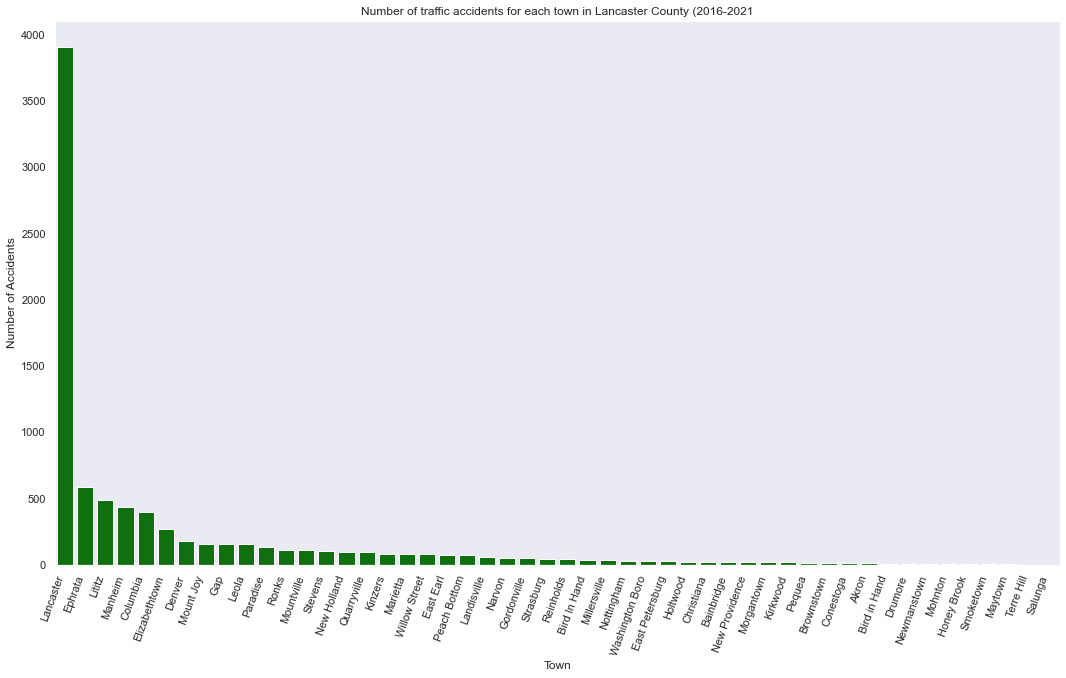

In [64]:
lancaster_county_counts = lancaster_county['City'].value_counts()

plt.figure(figsize=(18,10))
ax = plt.axes()
sns.barplot(x=lancaster_county_counts.index, y=lancaster_county_counts.values, color='green', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha='right')
plt.title('Number of traffic accidents for each town in Lancaster County (2016-2021')
plt.xlabel('Town')
plt.ylabel('Number of Accidents')
plt.show()

#lancaster_county_counts

In [114]:
import datetime
now = datetime.datetime.now()
midnight = now.replace(hour=0, minute=0, second=0, microsecond=0)
mins_since_midnight = []
for row in df['Start_Time']:
    minutes = (row - midnight).seconds // 60
    mins_since_midnight.append(minutes)
df['Mins_Since_Midnight'] = mins_since_midnight


In [115]:
scaler = MinMaxScaler(feature_range=(0, 24))
scaler.fit(df['Mins_Since_Midnight'].values.reshape(-1, 1))
df['Hour'] = scaler.transform(df['Mins_Since_Midnight'].values.reshape(-1, 1))

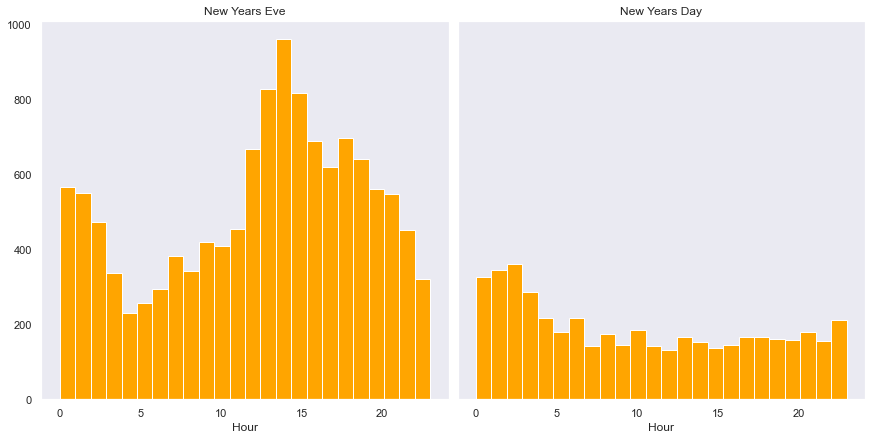

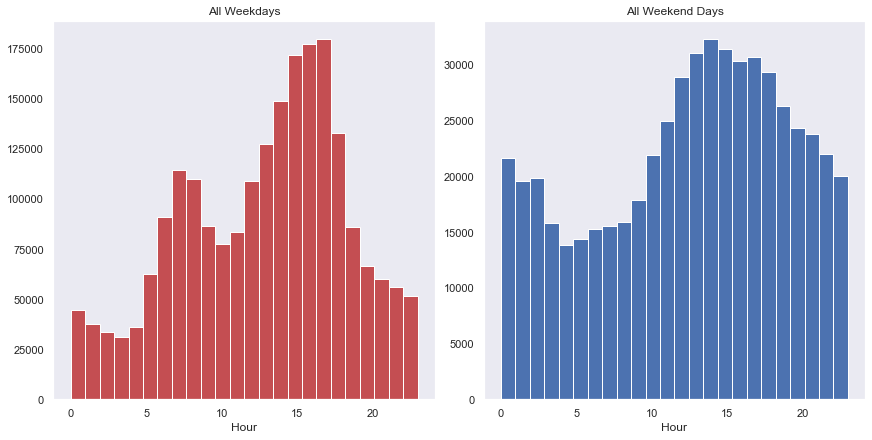

In [116]:
new_years_eve = df[(df['Start_Time'].dt.month == 12) & (df['Start_Time'].dt.day == 31)]
new_years_day = df[(df['Start_Time'].dt.month == 1) & (df['Start_Time'].dt.day == 1)]
weekend = df[(df['Start_Time'].dt.dayofweek == 5) | (df['Start_Time'].dt.dayofweek == 6)]
weekday_mask = ((df['Start_Time'].dt.dayofweek == 0) | (df['Start_Time'].dt.dayofweek == 1) | (df['Start_Time'].dt.dayofweek == 2) | (df['Start_Time'].dt.dayofweek == 3) | (df['Start_Time'].dt.dayofweek == 4))
weekday = df[weekday_mask]
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, sharey=True, figsize=(12,6))
fig, (ax3, ax4) = plt.subplots(1, 2, constrained_layout=True, sharey=False, figsize=(12,6))
ax1.hist(new_years_eve['Start_Time'].dt.hour, bins=24, color='orange')
ax2.hist(new_years_day['Start_Time'].dt.hour, bins=24, color='orange')
ax3.hist(weekday['Start_Time'].dt.hour, bins=24, color='r')
ax4.hist(weekend['Start_Time'].dt.hour, bins=24)
ax1.set_title('New Years Eve')
ax1.set_xlabel('Hour')
ax2.set_title('New Years Day')
ax2.set_xlabel('Hour')
ax3.set_title('All Weekdays')
ax3.set_xlabel('Hour')
ax4.set_title('All Weekend Days')
ax4.set_xlabel('Hour')
plt.show()

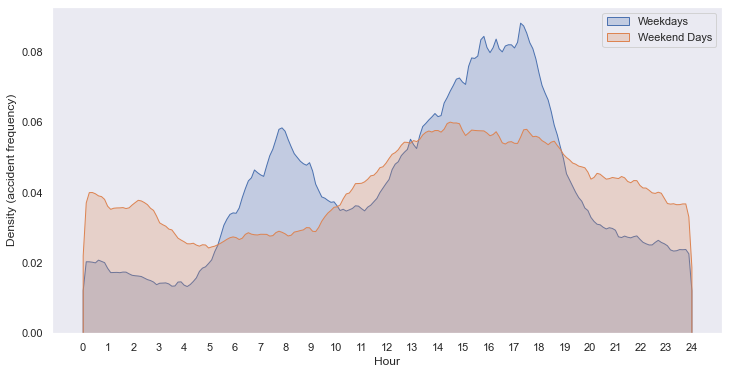

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=weekday['Hour'], fill=True, bw_adjust=0.2, clip=(0, 24), label='Weekdays')
sns.kdeplot(data=weekend['Hour'], fill=True, bw_adjust=0.2, clip=(0, 24), label='Weekend Days')
plt.xticks(range(0,25))
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Density (accident frequency)')
plt.show()

In [25]:
# Word count
tiny_df = df[:1000]
big_description_string = ""
for row in tiny_df['Description']:
    big_description_string += row
big_description_string

'Between Sawmill Rd/Exit 20 and OH-315/Olentangy Riv Rd/Exit 22 - Accident.At OH-4/OH-235/Exit 41 - Accident.At I-71/US-50/Exit 1 - Accident.At Dart Ave/Exit 21 - Accident.At Mitchell Ave/Exit 6 - Accident.At Dela Palma Rd - Accident.At OH-4/Exit 54 - Accident.At Bagley Rd/Exit 235 - Accident.At OH-65/Exit 122 - Accident.At I-71/Exit 26 - Accident.At OH-4/Paddock Rd/Exit 9 - Accident.At US-52/Hopple St/Exit 3 - Accident.At US-42/Exit 170 - Accident.Between OH-72/Exit 58 and US-35/Exit 65 - Accident.At Shipley Rd - Accident.At Titus Rd - Accident.At OH-16/Broad St/Exit 39 - Accident.At I-270 - Accident.Between Weber Rd/Exit 113 and Hudson St/Exit 112 - Accident.Closed between I-475/Exit 204 and US-24/Detroit Ave/Exit 203 - Road closed due to accident.At Fort Wayne - Accident.At I-275/Exit 185 - Accident.Between Broadway/Exit 114 and Weber Rd/Exit 113 - Accident.Between OH-48/Exit 29 and Dayton Intl Airport Rd/Exit 32 - Accident.At I-74/US-52/US-27/Exit 4 - Accident.At US-31/Exit 76 - Ac

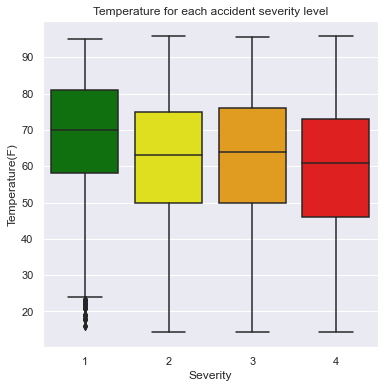

In [26]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Severity', y='Temperature(F)', data=df, palette=['green', 'yellow', 'orange', 'red'])
plt.title('Temperature for each accident severity level')
plt.show()